In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings("ignore")

In [2]:
# converting data into dataframe

yulu = pd.read_csv('bike_sharing.csv')

In [3]:
# making an copy of the dataset

df = yulu.copy()

In [4]:
# Top 5 rows of the dataframe

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# No of rows and columns

df.shape

(10886, 12)

In [6]:
# Checking of null values

df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

 **There are totally 10886 rows and 12 columns in the data**
 
**The data does not contain any nulls, thus no need of handling the missing data.**

In [7]:
# Duplicate values check

df.duplicated().sum()

0

In [8]:
# skewness of each column

df.skew(numeric_only = True)

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

**Skewness Analysis of Variables**

**Symmetrical Majority:** 
- The majority of the variables, including 'season' and 'temp', exhibit skewness values close to zero, suggesting relatively symmetrical distributions.

**Positive Skewness Insights:**
- Variables such as 'holiday', 'weather', 'windspeed', 'casual', 'registered', and 'count' demonstrate positive skewness, pointing to a concentration of lower values and a rightward skew in their distributions.

**Negative Skewness Observations:**
- In contrast, 'workingday', 'atemp', and 'humidity' exhibit negative skewness, implying a concentration of higher values and a leftward skew in their distributions.

In [9]:
# Uniques values of each columns

df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [10]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
# count column is sum of casual and the registered users

(df['casual'] + df['registered'] == df['count']).value_counts()

True    10886
Name: count, dtype: int64

In [12]:
# converting the categorical columns into category

cat_col = ['season', 'holiday', 'workingday', 'weather']

for _ in cat_col:
 df[_] = df[_].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [13]:
# Converting datetime column into date time format

df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].dtype

dtype('<M8[ns]')

In [14]:
# Creating new columns from datetime and converting them to categories

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [15]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


In [16]:
# replacing the number with category

# change of season
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})

# change of month
df['month'] = df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [17]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454
year,10886.0,2011.501929,2011.0,2011.0,2012.0,2012.0,2012.0,0.500019
day,10886.0,9.992559,1.0,5.0,10.0,15.0,19.0,5.476608


In [18]:
df.describe(include = 'category').transpose()

,count,unique,top,freq
season,10886,4,Winter,2734
holiday,10886,2,No,10575
workingday,10886,2,Yes,7412
weather,10886,4,1,7192


**Overview and Feature Patterns**

**Temporal and Numerical Composition:**
- The dataset encompasses both datetime information and various numerical features associated with bike rentals. The observations span from January 1, 2011, to December 19, 2012.

**Diverse Numerical Feature Characteristics:**
- Numerical features such as temperature, humidity, windspeed, and counts of casual and registered bike rentals show diverse ranges and distributions, highlighting the variability in rental patterns across different conditions.

**Temporal Patterns and Concentrations:**
- Observations on the year, day, and hour variables indicate temporal patterns, with a concentration in 2011 and 2012, a mean day value around 10, and an hourly distribution ranging from 0 to 23.

# Outlier Detection

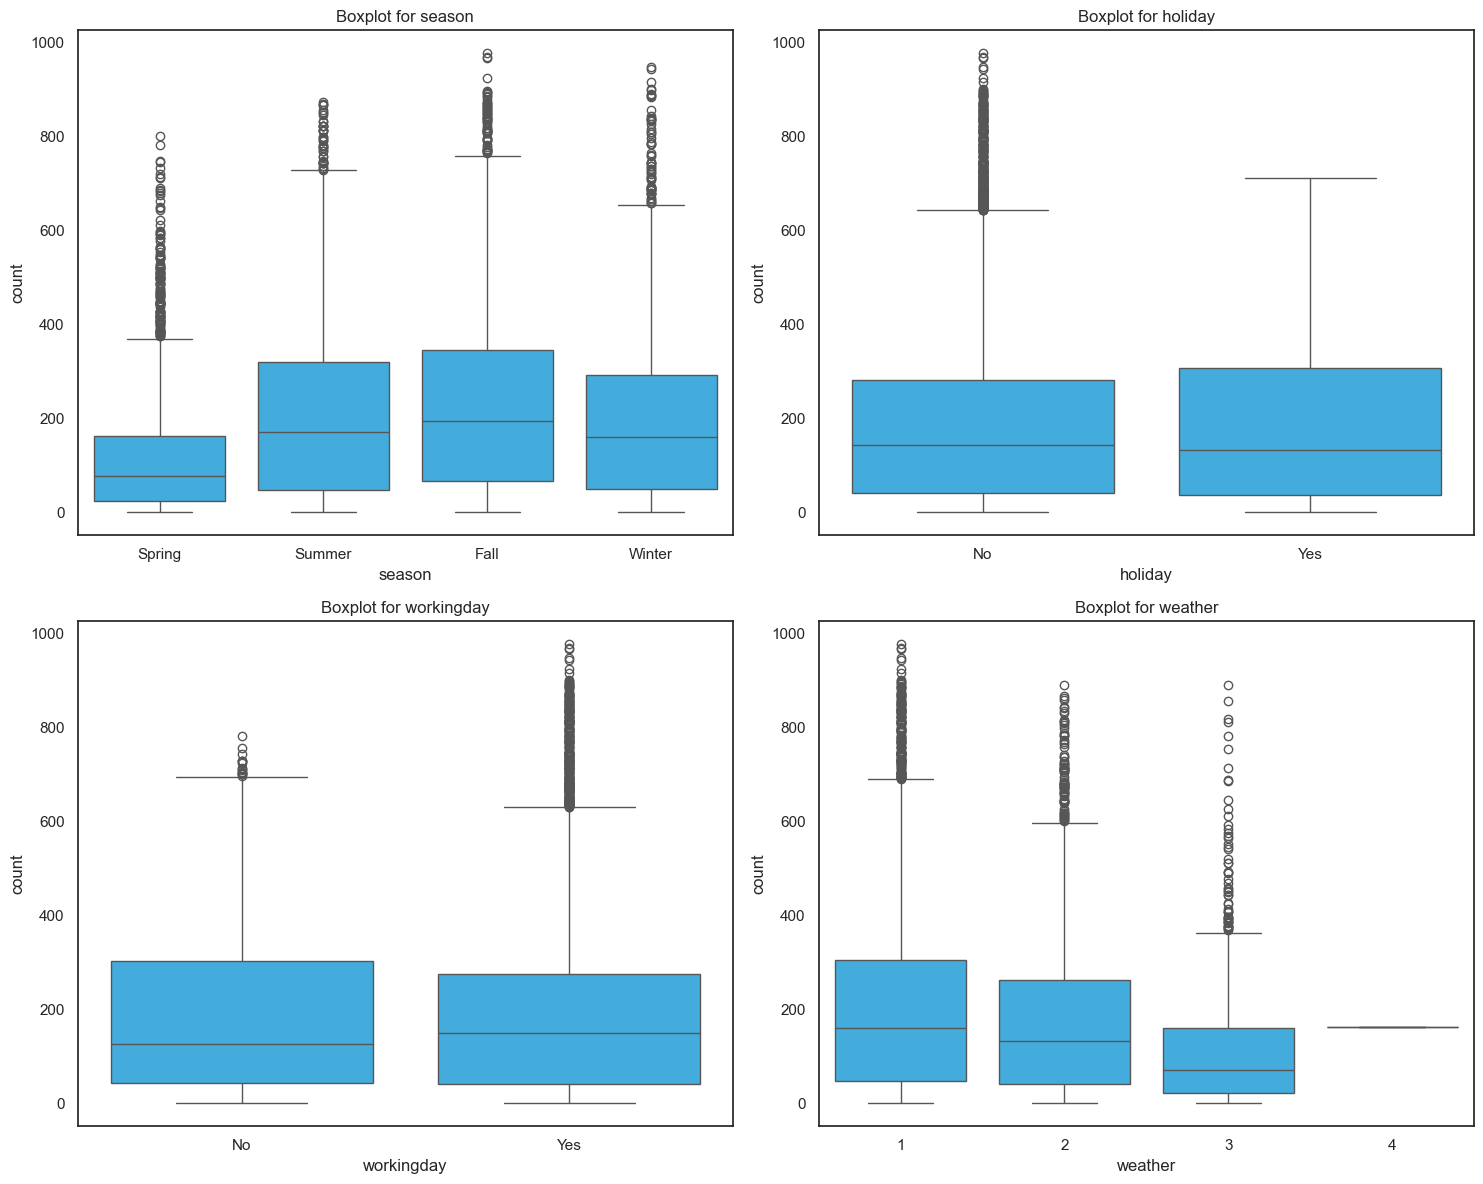

In [19]:
plt.figure(figsize=(15, 12))
sns.set(style="white")

for i, column in enumerate(cat_col,1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='count', data=df, color="#29B6F6")
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

**Outlier Analysis**

**Outliers in Different Seasons:**
- In spring and winter, there are more unusual values in the data compared to other seasons.

**Weather Outliers:**
- Category 3 weather has a lot of unusual values, while category 4 weather doesn't have any.

**Working Days vs. Holidays:**
- On regular working days, there are more unusual values in the data than on holidays. This suggests some unexpected patterns during typical workdays that might need a closer look.

# Univariate Analysis

In [20]:
# Time span of data
time_span = df['datetime'].max() - df['datetime'].min()
time_span

Timedelta('718 days 23:00:00')

In [21]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [22]:
# Season counts
df['season'].value_counts()

season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

In [23]:
# holiday counts
df['holiday'].value_counts()

holiday
No     10575
Yes      311
Name: count, dtype: int64

In [24]:
# workingday counts
df['workingday'].value_counts()

workingday
Yes    7412
No     3474
Name: count, dtype: int64

In [25]:
# weather counts
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [26]:
# year counts
df['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

In [27]:
# month counts
df['month'].value_counts()

month
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64

In [28]:
# day counts
df['day'].value_counts().sort_index()

day
1     575
2     573
3     573
4     574
5     575
6     572
7     574
8     574
9     575
10    572
11    568
12    573
13    574
14    574
15    574
16    574
17    575
18    563
19    574
Name: count, dtype: int64

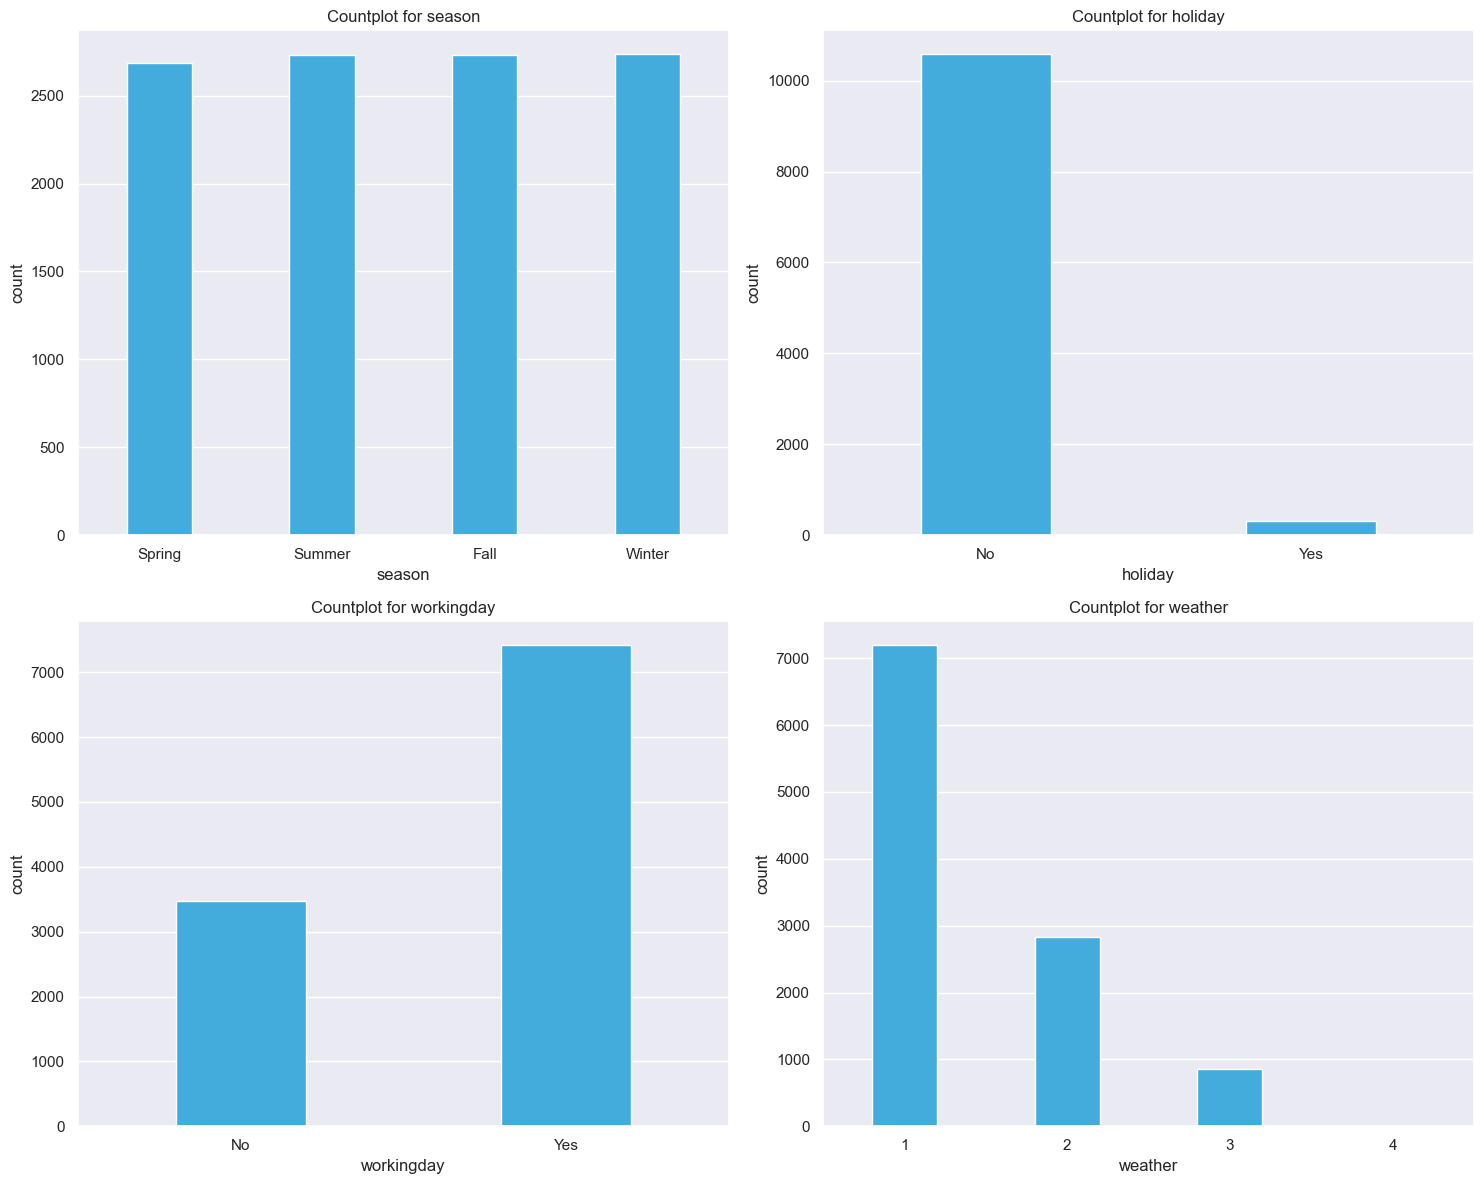

In [29]:
# countplot on categories

plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')
    
plt.tight_layout()
plt.show()

In [30]:
# Function for histogram & boxplot on numerical columns

def hist_box(column):
    f, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.set(style="darkgrid")
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column], color="#29B6F6")
    plt.title(f'Boxplot for {column}')
    
    tabular_data = df[column].describe().reset_index()
    tabular_data.columns = ['Statistic', 'Value']
    display(tabular_data)

    plt.tight_layout()
    plt.show()

,Statistic,Value
0,count,10886.00000
1,mean,20.23086
2,std,7.79159
3,min,0.82000
4,25%,13.94000
5,50%,20.50000
6,75%,26.24000
7,max,41.00000


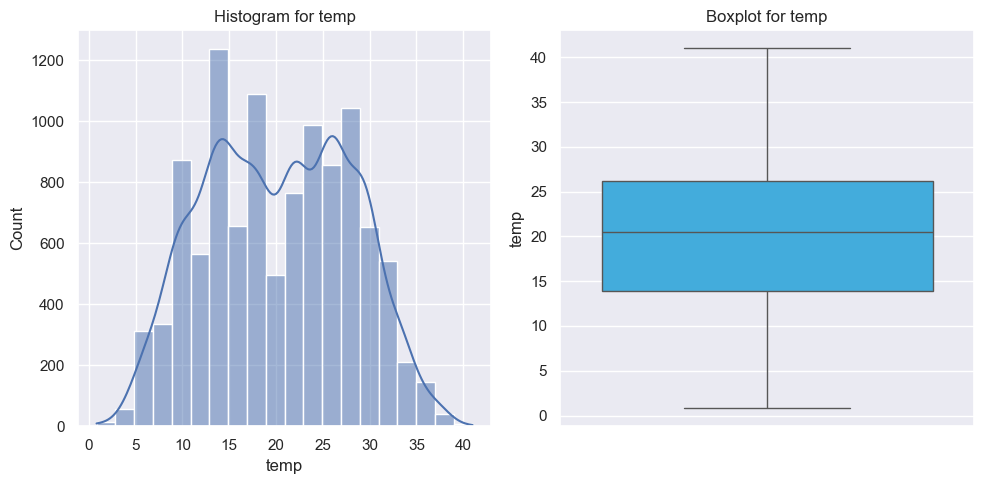

,Statistic,Value
0,count,10886.000000
1,mean,23.655084
2,std,8.474601
3,min,0.760000
4,25%,16.665000
5,50%,24.240000
6,75%,31.060000
7,max,45.455000


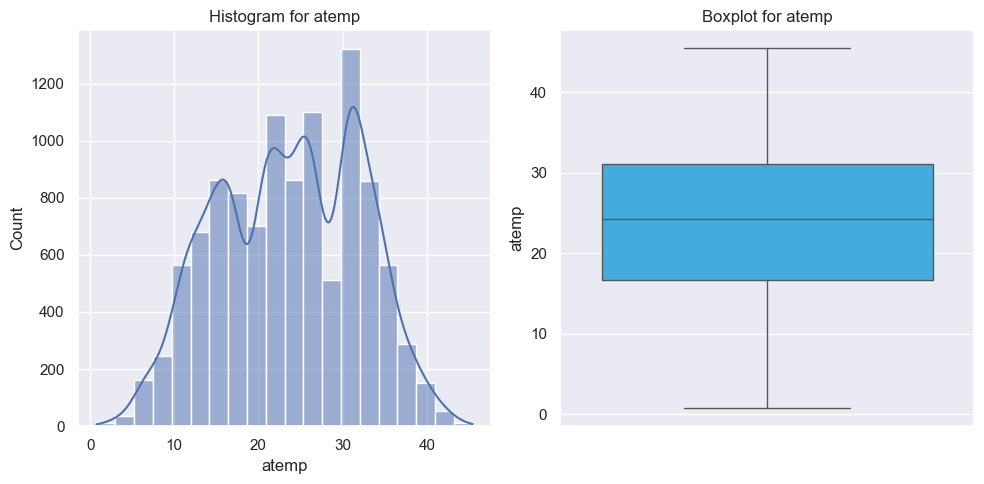

,Statistic,Value
0,count,10886.000000
1,mean,61.886460
2,std,19.245033
3,min,0.000000
4,25%,47.000000
5,50%,62.000000
6,75%,77.000000
7,max,100.000000


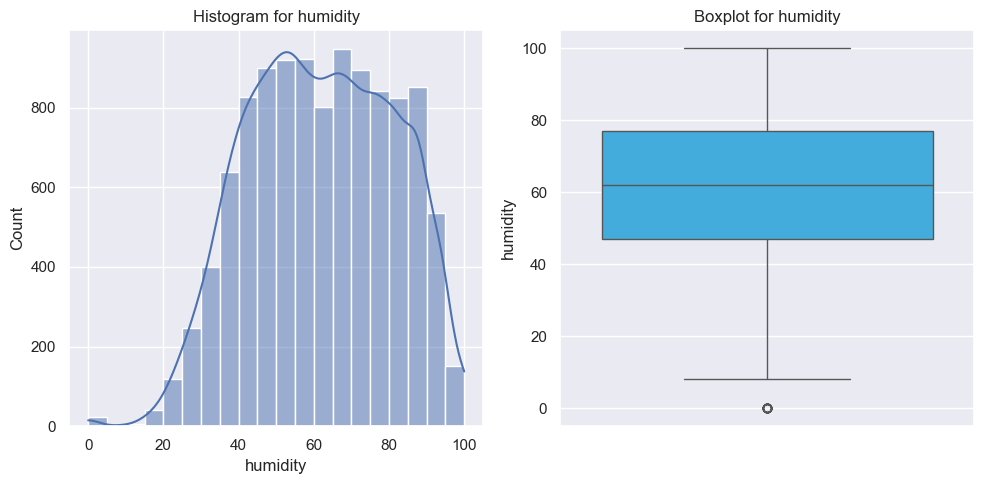

,Statistic,Value
0,count,10886.000000
1,mean,12.799395
2,std,8.164537
3,min,0.000000
4,25%,7.001500
5,50%,12.998000
6,75%,16.997900
7,max,56.996900


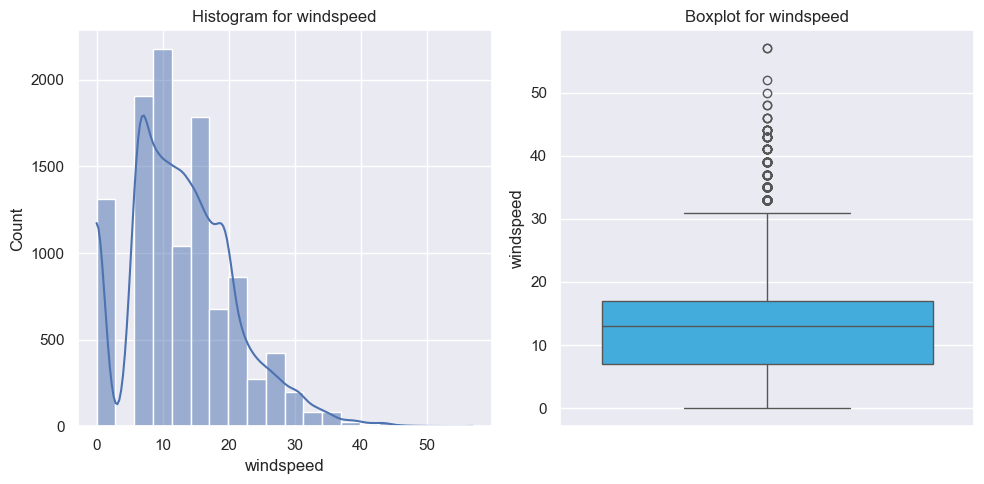

,Statistic,Value
0,count,10886.000000
1,mean,36.021955
2,std,49.960477
3,min,0.000000
4,25%,4.000000
5,50%,17.000000
6,75%,49.000000
7,max,367.000000


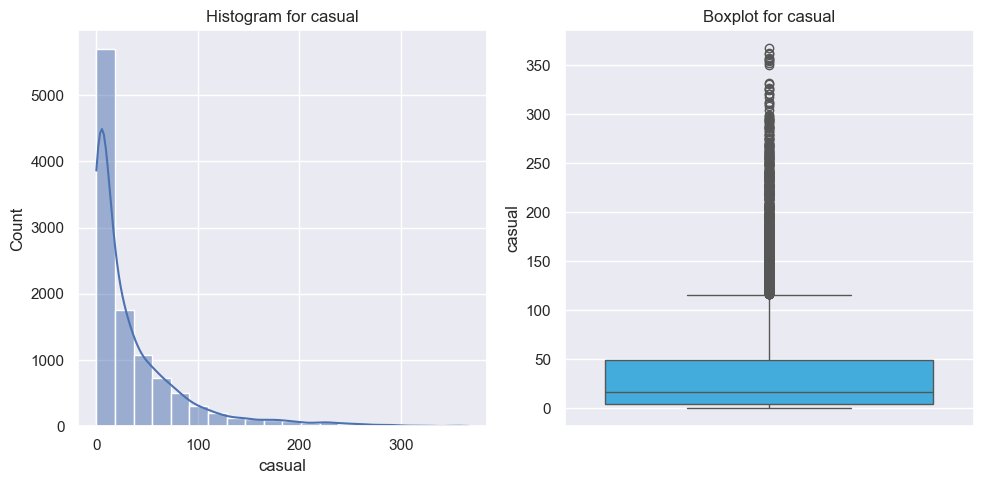

,Statistic,Value
0,count,10886.000000
1,mean,155.552177
2,std,151.039033
3,min,0.000000
4,25%,36.000000
5,50%,118.000000
6,75%,222.000000
7,max,886.000000


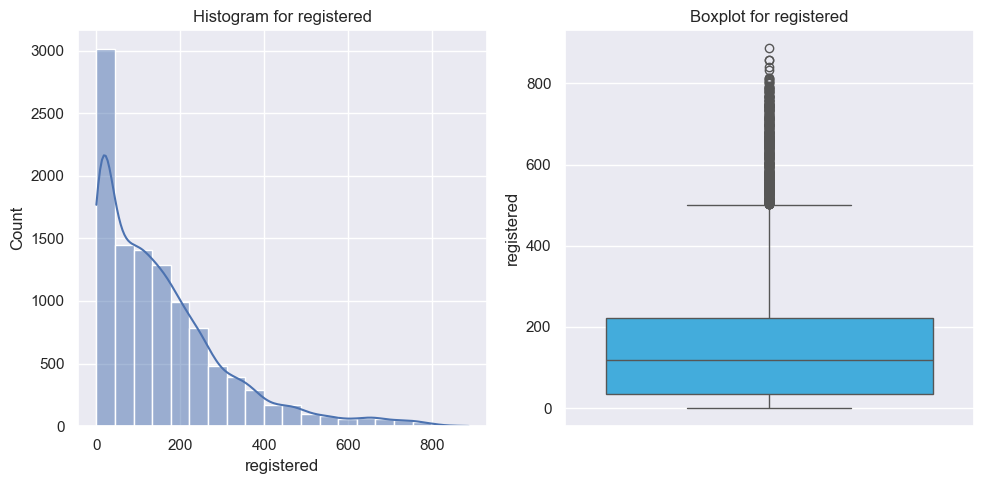

,Statistic,Value
0,count,10886.000000
1,mean,191.574132
2,std,181.144454
3,min,1.000000
4,25%,42.000000
5,50%,145.000000
6,75%,284.000000
7,max,977.000000


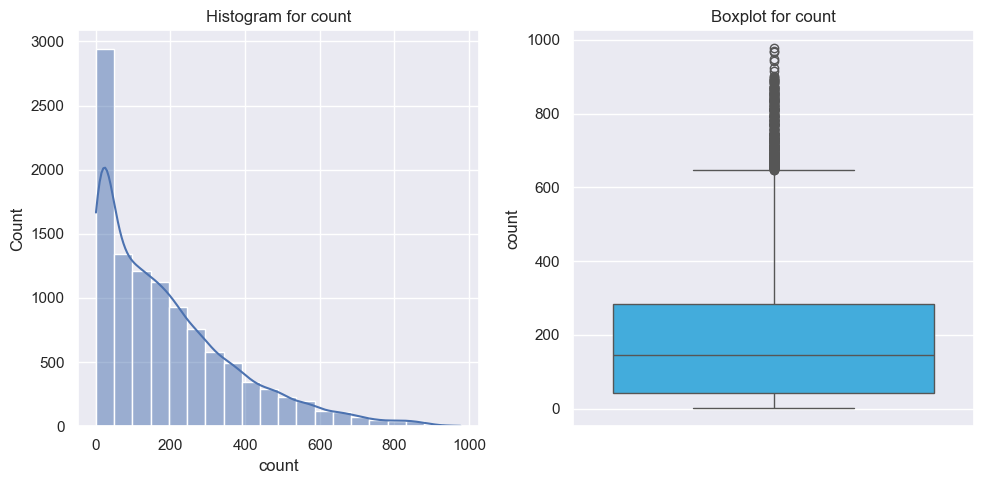

In [31]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for column in num_col:
    hist_box(column)

**Numerical column analysis**

**Temp:** 
- The 'temp' column shows a diverse temperature range (0.82 to 41.0), with a median of 20.5 and moderate variability around the mean of approximately 20.23 degrees Celsius.

**Atemp** 
- The 'atemp' column displays a wide range of apparent temperatures (0.76 to 45.455), with a mean of approximately 23.66 and moderate variability around the median of 24.24.

**Humidity**
- The 'humidity' column depicts a range of humidity values (0 to 100), with an average around 61.89. The distribution shows moderate variability, from 47 at the 25th percentile to 77 at the 75th percentile, indicating diverse humidity levels in the dataset.

**WindSpeed**
- The 'windspeed' column displays a range of wind speeds from 0 to 56.9979, with a mean of approximately 12.80. 

**Casual** 
- The 'casual' column demonstrates a broad range of casual bike rental counts, with values spanning from 0 to 367. The distribution is positively skewed, as indicated by the mean (36.02) being less than the median (17.0).

**Registered**
- The 'registered' column showcases a diverse range of registered bike rental counts, ranging from 0 to 886. The distribution is positively skewed, evidenced by the mean (155.55) being less than the median (118.0).

**Count** 
- The 'count' column reveals a wide range of total bike rental counts, varying from 1 to 977. The distribution is positively skewed, with a mean (191.57) greater than the median (145.0), indicating a concentration of lower values

# Bivariate Analysis

In [32]:
cat_col

['season', 'holiday', 'workingday', 'weather']

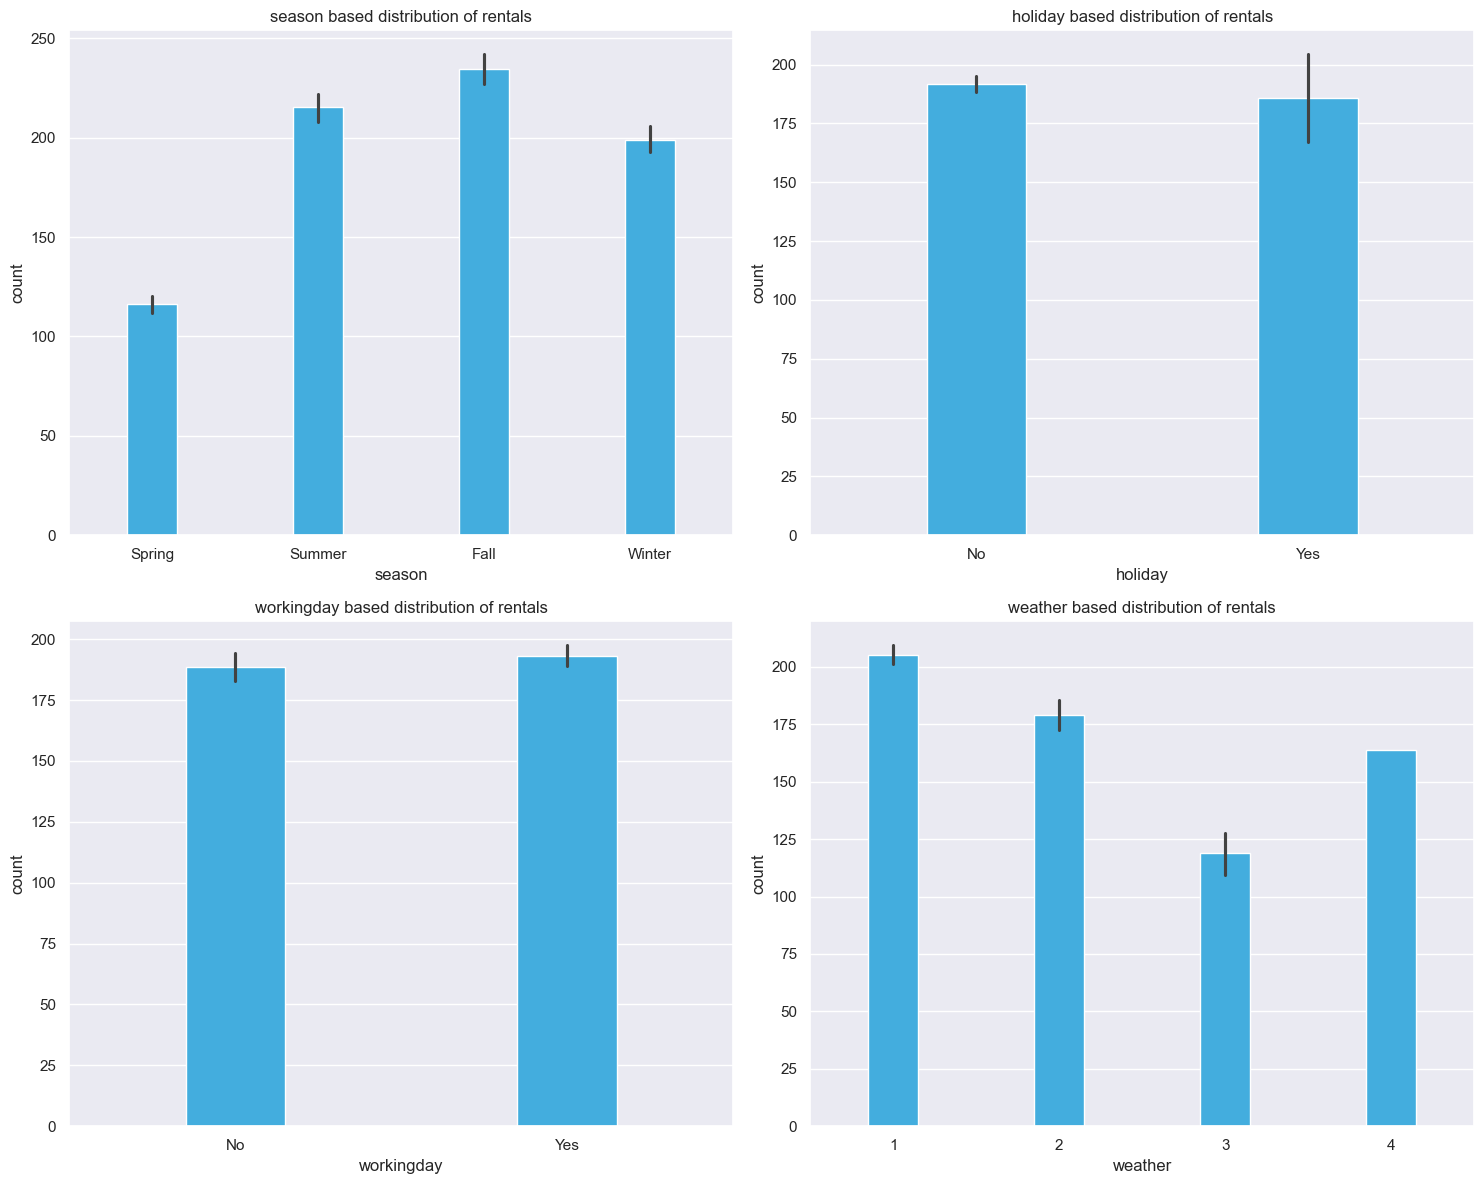

In [33]:
# barplot of categories

plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col,1):
    plt.subplot(2, 2, i)
    sns.barplot(x=column, y='count', data=df, color="#29B6F8", width = 0.3)
    plt.title(f'{column} based distribution of rentals')
    
plt.tight_layout()
plt.show()

In [34]:
# corrrelation analysis

correlation_matrix = df[["atemp", "temp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.984948,-0.043536,-0.057473,0.462067,0.314635,0.389784
temp,0.984948,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.043536,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.057473,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.462067,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.314635,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.389784,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


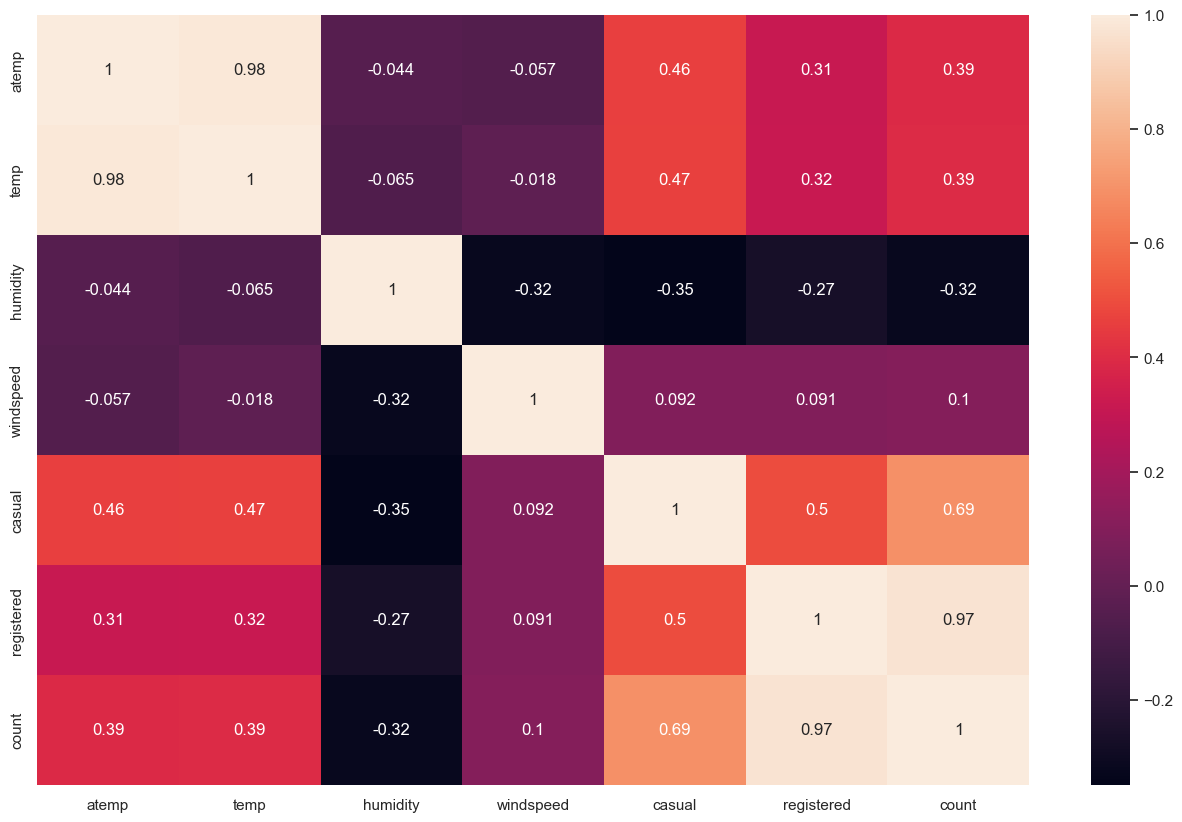

In [35]:
# correlation chart

plt.figure(figsize = (16, 10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

**Correlation Analysis**

**Atemp:**

- Strong positive correlation with 'temp' (0.98), indicating a close relationship.
- Moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
- Positive correlation with 'count' (0.39), suggesting a relationship with overall bike rentals.

**Temp (Temperature):**

- Highly correlated with 'atemp' (0.98), indicating a strong connection.
- Moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
- Positive correlation with 'count' (0.39), showing a relationship with overall bike rentals.

**Humidity:**

- Weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
- Moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
- Indicates a tendency for fewer bike rentals during higher humidity.

**Windspeed:**

- Weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
- Weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
- Suggests a subtle influence on bike rentals with increasing wind speed.

**Casual (Casual Bike Rentals):**

- Strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
- Moderate negative correlation with 'humidity' (-0.35) and positive correlation with 'windspeed' (0.09).
- Highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.

**Registered (Registered Bike Rentals):**

- Positive correlation with 'atemp' (0.31) and 'temp' (0.32).
- Negative correlation with 'humidity' (-0.27) and positive correlation with 'windspeed' (0.09).
- Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.

**Count (Total Bike Rentals):**

- Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
- Negative correlation with 'humidity' (-0.32).
- Highly correlated with 'registered' (0.97), emphasizing the joint impact of casual and registered rentals on the overall count.

In [36]:
# counts based on months

monthly_count = df.groupby('month')['count'].sum().reset_index()

monthly_count = monthly_count.sort_values(by='count', ascending=False)

monthly_count

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


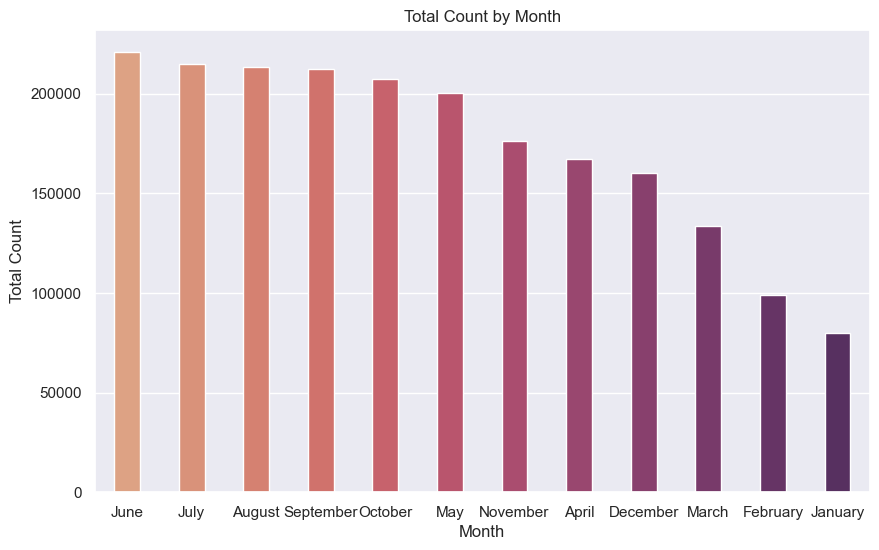

In [37]:
# rentals on monthly counts

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=monthly_count, palette='flare', width = 0.4)

plt.title('Total Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()

**Monthly analysis on rentals**

**Peak Rental Months:**
- June stands out as the peak month for bike rentals, with the highest count of 220,733, followed closely by July and August.

**Seasonal Trend:**
- Summer months (June, July, August) show higher bike rental counts, consistent with favorable weather conditions.

**Off-Peak Rental Months:**
- January, February, and March have notably lower bike rental counts, indicating potential off-peak periods, possibly influenced by colder weather or fewer outdoor activities.

# Hypothesis Testing

### Demand of bicycles on rent is the same on Weekdays & Weekends

Since we have two independent saples, we can go with Two Sample Independent T-Test.

**Assumptions of Two Sample Independent T-Test :**

- **The data should be normall distributed**<br><br>

- **variances of the two groups are equal**

**Let the Confidence interval be 95%, so siginificance (alpha) is 0.05**

### To check if the data is normal, we will go with Wilkin-ShapiroTest.

**The test hypothesis for the Wilkin-Shapiro test are:**

- **Ho: Data is normally distributed**<br><br>

- **Ha: Data is not normally distributed.**

In [38]:
np.random.seed(41)

df_subset = df.sample(100)["count"]

test_stat, p_val = shapiro(df_subset)

p_val

2.6341072612012795e-07

Hence the p_values is lesser than the significance level, Null hypothesis can be rejected.

**Therefore, the Data is not normally distributed.**

### QQ Plot analysis

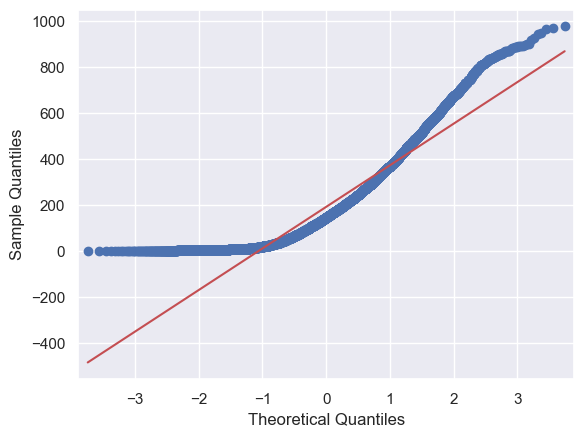

In [39]:
# QQ plot

qqplot(df['count'], line = 's')
plt.show()

### To check if the variances of two groups are equal. We will perform Levene's test

**The Test hypotheses for Levene's test are:**

- **Ho: The variances are equal.**<br><br>

- **Ha: The variances are not equal.**

In [40]:
working_day = df[df['workingday'] == 'Yes']['count']

holiday = df[df['workingday'] == 'No']['count']

levene_stat, p_val = levene(working_day, holiday)

p_val

0.9437823280916695

<Axes: xlabel='count', ylabel='Density'>

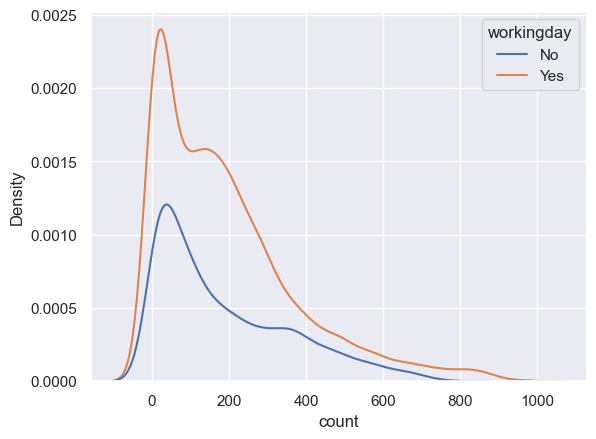

In [41]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')

<Axes: xlabel='count', ylabel='Count'>

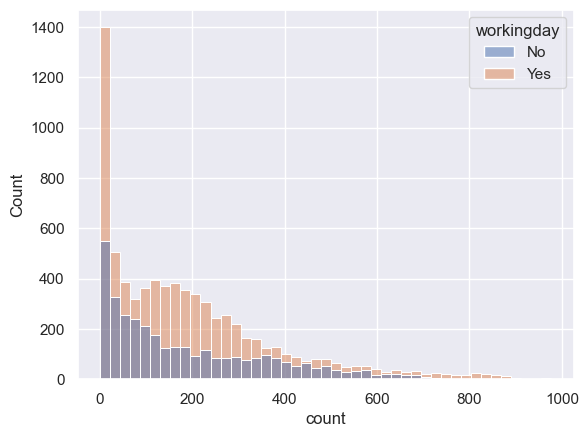

In [61]:
sns.histplot(data = df, x = 'count', hue = 'workingday')

Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

**Therefore, the variances are approximately equal.**

Despite the data is not normally distributed according to both the Wilkin-ShapiroTest and qq-plot<br><br>
It is important to highlight that the variances between the two groups are equal**<br><br>
**So we can proceed with the Two Sample Independent T-Test.**

**The hypothesis for the t-test are:**

- **Ho: There is no significant difference between working and non-working days.**<br><br>

- **Ha: There is a significant difference between working and non-working days.**

In [43]:
ttest_stat, p_val = ttest_ind(working_day, holiday)

p_val

0.22644804226361348

Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

**Therefore, There is no significant difference on bike rentals between working and non-working days.**

In [44]:
kruskal_stat, p_val = kruskal(working_day, holiday)

p_val

0.9679113872727798

Hence the p_values is greater than the significance level, Null hypothesis can be accepted.

**Therefore, There is no significant difference on bike rentals between working and non-working days.**

### Demand of bicycles on rent is the same for different Weather conditions

Since we have more than two categories now, so will use ANOVA here.

**Assumptions for ANOVA are:**

1. The population data should be normally distributed- The data is not normal as verified by **Wilkin-Shapiro test and the qqplot.**<br><br>

2. The data points must be independent- This condition is satisfied.<br><br>

3. Approximately equal variance within groups- This will be verified using **Levene's test.**

In [45]:
# skewness of weather 

df.groupby('weather')['count'].skew()

weather
1    1.139857
2    1.294444
3    2.187137
4         NaN
Name: count, dtype: float64

In [46]:
# kurtosis test of weather

df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

weather
1    0.964720
2    1.588430
3    6.003054
4         NaN
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Density'>

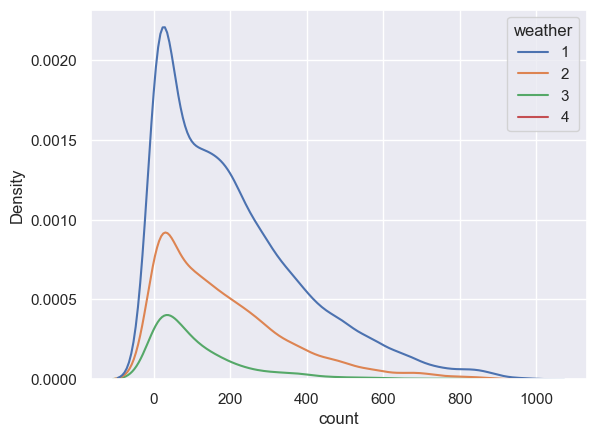

In [47]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')

<Axes: xlabel='count', ylabel='Count'>

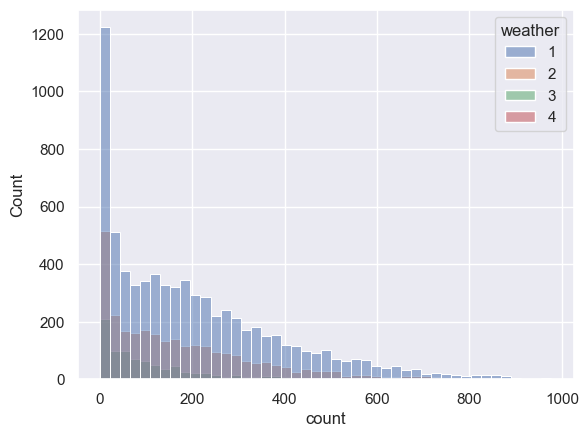

In [48]:
sns.histplot(data = df, x = 'count', hue = 'weather')

**The Test hypothesis for Levene's test are:**

- **Ho: The variances are equal.**<br><br>

- **Ha: The variances are not equal.**

In [49]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']

levene_stat, p_val = levene(weather1, weather2, weather3,weather4)

p_val

3.504937946833238e-35

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, the variances are not equal.**

Two of the three conditions of ANOVA are not met, **We will still perform ANOVA**.

Then We will also perform **Kruskal's test and compare the results**.

In case of any discrepancies, Kruskal's test results will be considered, since data does not met conditions of ANOVA.

**The hypothesis for ANOVA are:**

- **Ho: There is no significant difference between demand of bicycles for different Weather conditions.**<br><br>

- **Ha: There is a significant difference between demand of bicycles for different Weather conditions.**

In [50]:
anova_stat, p_val = f_oneway(weather1, weather2, weather3,weather4)

p_val

5.482069475935669e-42

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, There is a significant difference between demand of bicycles for different Weather conditions.**

### Kruskal Test on weather

In [51]:
kruskal_stat, p_val = kruskal(weather1, weather2, weather3,weather4)

p_val

3.501611300708679e-44

Again the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that there is a significant difference between demand of bicycles for different Weather conditions.**

### Demand of bicycles on rent is the same for different Seasons

Here also we have more than two categories now, so will use ANOVA here.

**Assumptions for ANOVA are:**

1. The population data should be normally distributed- The data is not normal as verified by **Wilkin-Shapiro test and the qqplot.**<br><br>

2. The data points must be independent- This condition is satisfied.<br><br>

3. Approximately equal variance within groups- This will be verified using **Levene's test.**

In [52]:
# skewness of seasons

df.groupby('season')['count'].skew()

season
Spring    1.888056
Summer    1.003264
Fall      0.991495
Winter    1.172117
Name: count, dtype: float64

In [53]:
# kurtosis test of seasons

df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

weather
1    0.964720
2    1.588430
3    6.003054
4         NaN
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Density'>

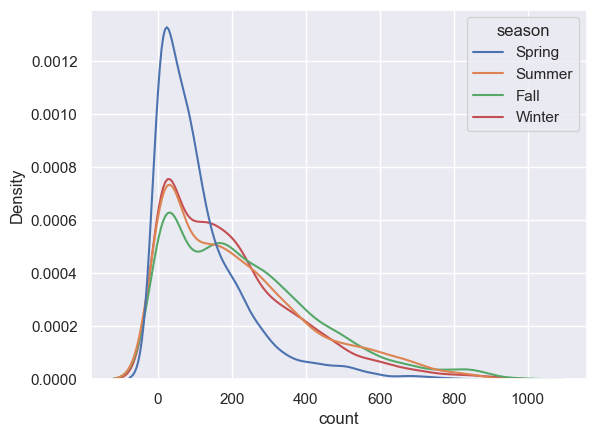

In [54]:
sns.kdeplot(data = df, x = 'count', hue = 'season')

<Axes: xlabel='count', ylabel='Count'>

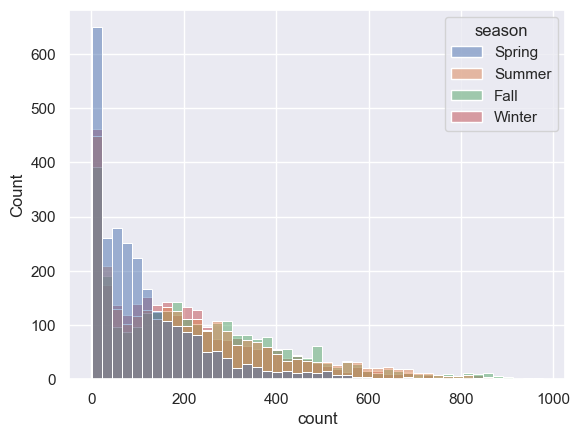

In [55]:
sns.histplot(data = df, x = 'count', hue = 'season')

**The Test hypothesis for Levene's test are:**

- **Ho: The variances are equal.**<br><br>

- **Ha: The variances are not equal.**

In [56]:
spring = df[df['season'] == 'Spring']['count']
summer = df[df['season'] == 'Summer']['count']
fall = df[df['season'] == 'Fall']['count']
winter = df[df['season'] == 'Winter']['count']

levene_stat, p_val = levene(spring,summer,fall,winter)

p_val

1.0147116860043298e-118

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, the variances are not equal.**

As like before, we still use both ANOVA and Kruskal's test, comparing the results.

If discrepancies arise, we'll rely on **Kruskal's test**, Since data does not met the conditions for ANOVA.

**The hypothesis for ANOVA are:**

- **Ho: There is no significant difference between demand of bicycles for different Seasons.**<br><br>

- **Ha: There is a significant difference between demand of bicycles for different Seasons.**

In [57]:
anova_stat, p_val = f_oneway(spring ,summer, fall, winter)

p_val

6.164843386499654e-149

Hence the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, There is a significant difference between demand of bicycles for different Seasons.**

### Kruskal Test on season

In [58]:
kruskal_stat, p_val = kruskal(spring ,summer, fall, winter)

p_val

2.479008372608633e-151

Again the p_values is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that there is a significant difference between demand of bicycles for different Seasons.**

### Analysis of Weather Conditions Across Seasons using Chi-square Test 

**The hypothesis for the chi-square test are:**

**Ho: Season and Weather are independent of each other.**

**Ha: Season and Weather are dependent on each other.**

In [59]:
contingency_table = pd.crosstab(df['weather'], df['season'])

contingency_table

season,Spring,Summer,Fall,Winter
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [60]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

Hence the p_values(1.5499250736864862e-07) is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that Season and Weather are dependent on each other.**

### Strategic Recommendations for Yulu's Profitable Growth

**Optimize Bike Distribution in Peak Months:**

- Concentrate bike deployment efforts during peak months, especially in June, July, and August, to meet increased demand and capitalize on favorable weather conditions.

**Seasonal Marketing Strategies:**

- Tailor marketing efforts to leverage the seasonal trend, promoting Yulu's services more aggressively during summer months to attract a larger user base.

**Enhance User Engagement in Off-Peak Months:**

- Implement targeted promotional campaigns or discounts during off-peak months (e.g., January to March) to encourage increased bike rentals and maintain consistent revenue flow.

**Weather-Responsive Pricing:**

- Consider implementing dynamic pricing strategies that respond to weather conditions. For example, adjusting rental rates during extreme weather days to optimize revenue.

**Diversify Revenue Streams:**

- Explore additional revenue streams, such as partnerships, sponsorships, or offering premium membership services with added benefits, to diversify income sources and boost overall profitability.

**Enhance User Experience:**

- Invest in technology and infrastructure to improve the overall user experience, including app features, bike maintenance, and customer support, fostering loyalty and repeat business.

**Optimize Bike Deployment on Working Days:**

- Given the lack of significant differences in bike rentals between working and non-working days, consider adjusting bike deployment strategies to ensure optimal resource allocation throughout the week.

**Adapt to Different Weather Conditions:**

- Change promotions or discounts based on the weather. If it's rainy, for example, offer special deals to encourage more people to use the bikes.

**Promote Bikes Differently in Each Season:**

- Advertise the bikes differently in each season. For example, highlight summer promotions in June, July, and August when more people want to ride bikes.

**Combine Season and Weather Plans:**

- Plan bike availability based on both the season and the weather to make sure people have the bikes they need when they want them. For example, have more bikes available on sunny days in the summer.